## Regression in PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.]) # E.g.: Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [3]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) # E.g.: Patient's "forgetfulness score"
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

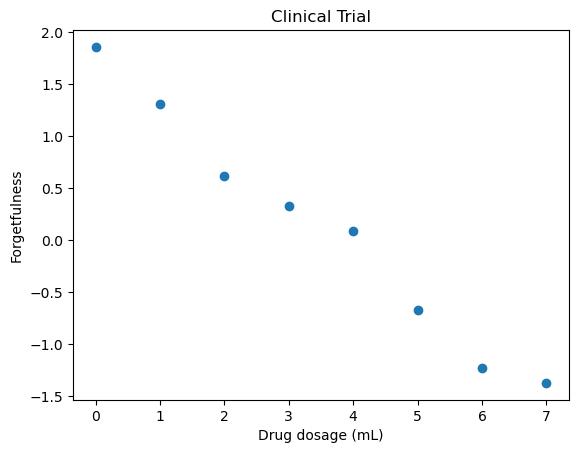

In [4]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y)

Initialize the slope parameter $m$ with a "random" value of 0.9...

(In this simple demo, we could guess approximately-correct parameter values to start with. Or, we could use an algebraic (e.g., Moore-Penrose pseudoinverse) or statistical (e.g., ordinary-least-squares regression) to solve for the parameters quickly. This tiny machine learning demo with two parameters and eight data points scales, however, to millions of parameters and millions of data points. The other approaches -- guessing, algebra, statistics -- do not come close to scaling in this way.)

In [5]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

...and do the same for the $y$-intercept parameter $b$: 

In [6]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [7]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [12]:
def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    ax.set_xlim([x_min, x_max])
    
    _ = ax.plot([x_min, x_max], [y_min, y_max])

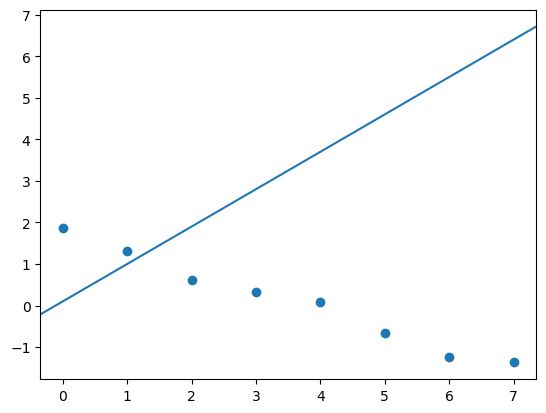

In [13]:
regression_plot(x, y, m, b)

This code defines two functions, `regression` and `regression_plot`, which are used for linear regression and plotting linear regression results, respectively. The code seems to rely on the PyTorch library for some calculations and Matplotlib for visualization. Let's break down each function step by step:

### `regression` function:

```python
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b
```

This function implements a simple linear regression model. It takes three parameters:
- `my_x`: An input value (independent variable).
- `my_m`: The slope of the linear regression line.
- `my_b`: The y-intercept of the linear regression line.

It calculates the predicted y-value (`my_m * my_x + my_b`) based on the input values and returns it. This function represents a linear equation, where `my_m` represents the slope of the line, and `my_b` represents the y-intercept.

### `regression_plot` function:

```python
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()
    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])
```

This function is used to plot a scatter plot of data points (`my_x` and `my_y`) along with the linear regression line. Here's how it works step by step:

1. `fig, ax = plt.subplots()`: This line creates a Matplotlib figure (`fig`) and an axis (`ax`) for plotting.

2. `ax.scatter(my_x, my_y)`: This line creates a scatter plot of the data points. `my_x` represents the x-values, and `my_y` represents the corresponding y-values.

3. `x_min, x_max = ax.get_xlim()`: This line retrieves the minimum and maximum values of the x-axis limits from the plot.

4. `y_min = regression(x_min, my_m, my_b).detach().item()`: Here, it calculates the y-value for the leftmost point on the x-axis using the `regression` function. `.detach().item()` is used to extract the numerical value from the PyTorch tensor returned by the `regression` function.

5. `y_max = regression(x_max, my_m, my_b).detach().item()`: Similar to the previous line, it calculates the y-value for the rightmost point on the x-axis.

6. `ax.set_xlim([x_min, x_max])`: This line sets the x-axis limits of the plot to match the data's range.

7. `_ = ax.plot([x_min, x_max], [y_min, y_max])`: Finally, it plots the linear regression line as a line connecting the points `[x_min, y_min]` and `[x_max, y_max]`.

This function essentially plots the data points and overlays a linear regression line on top of them based on the provided slope (`my_m`) and y-intercept (`my_b`). The result is a scatter plot with the regression line.

## Machine Learning


**Step 1**: Forward pass

In [14]:
yhat = regression(x, m, b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

There is a PyTorch `MSELoss` method, but let's define it outselves to see how it works. MSE cost is defined by: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [15]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [16]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [17]:
C.backward()

In [18]:
m.grad

tensor([36.3050])

In [19]:
b.grad

tensor([6.2650])

**Step 4**: Gradient descent

In [20]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [21]:
optimizer.step()

Confirm parameters have been adjusted sensibly: 

In [22]:
m

tensor([0.5369], requires_grad=True)

In [23]:
b

tensor([0.0374], requires_grad=True)

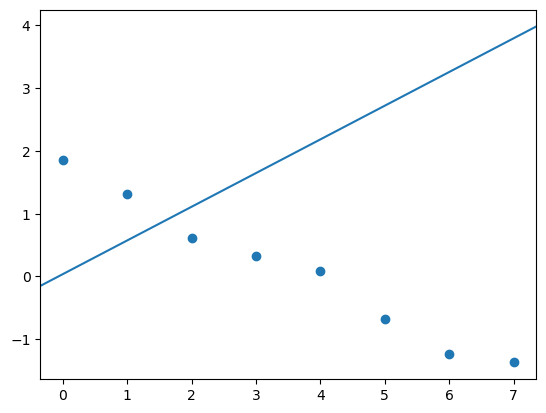

In [24]:
regression_plot(x, y, m, b)

We can repeat steps 1 and 2 to confirm cost has decreased: 

In [25]:
C = mse(regression(x, m, b), y)
C

tensor(8.5722, grad_fn=<DivBackward0>)

Put the 4 steps in a loop to iteratively minimize cost toward zero: 

In [30]:
epochs = 1000
for epoch in range(epochs):
    
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhat = regression(x, m, b) # Step 1
    C = mse(yhat, y) # Step 2
    
    C.backward() # Step 3
    optimizer.step() # Step 4
    
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 0.0195, m grad 0.000668, b grad -0.00329
Epoch 1, cost 0.0195, m grad 0.000665, b grad -0.00327
Epoch 2, cost 0.0195, m grad 0.000661, b grad -0.00325
Epoch 3, cost 0.0195, m grad 0.000658, b grad -0.00323
Epoch 4, cost 0.0195, m grad 0.000653, b grad -0.00321
Epoch 5, cost 0.0195, m grad 0.00065, b grad -0.00319
Epoch 6, cost 0.0195, m grad 0.000646, b grad -0.00318
Epoch 7, cost 0.0195, m grad 0.000642, b grad -0.00316
Epoch 8, cost 0.0195, m grad 0.000639, b grad -0.00314
Epoch 9, cost 0.0195, m grad 0.000635, b grad -0.00312
Epoch 10, cost 0.0195, m grad 0.000631, b grad -0.0031
Epoch 11, cost 0.0195, m grad 0.000628, b grad -0.00309
Epoch 12, cost 0.0195, m grad 0.000623, b grad -0.00307
Epoch 13, cost 0.0195, m grad 0.00062, b grad -0.00305
Epoch 14, cost 0.0195, m grad 0.000616, b grad -0.00303
Epoch 15, cost 0.0195, m grad 0.000612, b grad -0.00302
Epoch 16, cost 0.0195, m grad 0.00061, b grad -0.003
Epoch 17, cost 0.0195, m grad 0.000605, b grad -0.00298
Epoch 18

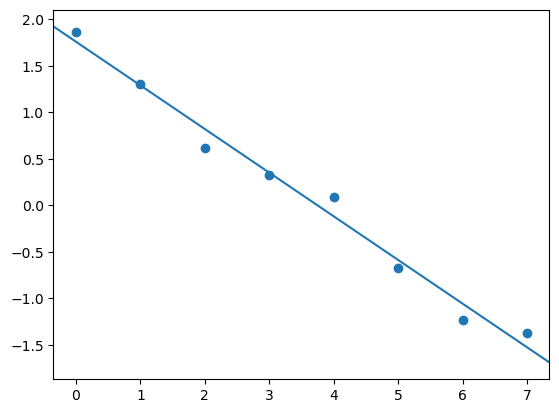

In [31]:
regression_plot(x, y, m, b)

In [32]:
m.item()

-0.4692818224430084

In [29]:
b.item()

1.7542961835861206

**N.B.**: The model doesn't perfectly approximate the slope (-0.5) and $y$-intercept (2.0) used to simulate the outcomes $y$ at the top of this notebook. This reflects the imperfectness of the sample of eight data points due to adding random noise during the simulation step. In the real world, the best solution would be to sample additional data points: The more data we sample, the more accurate our estimates of the true underlying parameters will be. 

This code appears to be a simple implementation of linear regression using PyTorch, including the calculation of the mean squared error (MSE) loss and gradient descent optimization to update the model parameters `m` and `b`. Let's break down the code step by step:

### Initial Definitions:

1. `yhat = regression(x, m, b)`: This line calculates the predicted values `yhat` using the `regression` function defined earlier. `x` represents the input data, while `m` and `b` represent the slope and intercept of the linear regression model, respectively.

2. `def mse(my_yhat, my_y)`: This function, `mse`, computes the Mean Squared Error (MSE) loss between the predicted values `my_yhat` and the true values `my_y`. The formula for MSE is `(1/n) * Σ(my_yhat - my_y)^2`, where `n` is the number of data points.

3. `C = mse(yhat, y)`: This line calculates the initial MSE loss `C` between the predicted values `yhat` and the actual values `y`.

### Gradient Descent Optimization:

The code then enters a loop to perform gradient descent optimization:

```python
epochs = 1000
for epoch in range(epochs):
```

Inside the loop, the following steps are performed for each epoch:

1. `optimizer.zero_grad()`: This line resets the gradients of the model parameters (`m` and `b`) to zero. It's necessary to do this before computing gradients in each iteration to avoid accumulation.

2. `yhat = regression(x, m, b)`: Here, the code calculates the predicted values `yhat` based on the current values of `m` and `b`.

3. `C = mse(yhat, y)`: This calculates the MSE loss `C` between the predicted values `yhat` and the true values `y`.

4. `C.backward()`: This line computes the gradients of the loss `C` with respect to the model parameters (`m` and `b`) using backpropagation. This is where the gradients are calculated so that they can be used to update the model.

5. `optimizer.step()`: The optimizer (which is assumed to be defined elsewhere in the code) updates the model parameters `m` and `b` using the computed gradients and the optimization algorithm (e.g., gradient descent).

6. The code then prints the current epoch, the cost (MSE), and the gradients of `m` and `b`.

### After Training:

After the training loop, you have the following lines of code:

```python
regression_plot(x, y, m, b)
m.item()
b.item()
```

- `regression_plot(x, y, m, b)`: This line plots the final regression line along with the data points.

- `m.item()`: This retrieves the final value of the slope `m` as a numerical scalar.

- `b.item()`: This retrieves the final value of the intercept `b` as a numerical scalar.

The code essentially performs a training loop to adjust the parameters `m` and `b` to minimize the MSE loss between the predicted values and the true values, and then it visualizes the resulting regression line. This is a basic example of linear regression using gradient descent for optimization.